Load our basic libraries

In [26]:
from __future__ import print_function

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
    
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

Run ETUDE as normal and capture the output into a variable

In [27]:
parent_counts = \
  !python ../etude.py \
    --reference-input ../tests/data/i2b2_2016_track-1_reference \
    --reference-config ../config/i2b2_2016_track-1.conf \
    --test-input ../tests/data/i2b2_2016_track-1_test \
    --test-config ../config/i2b2_2016_track-1.conf \
    --file-suffix ".xml" \
    --score-key "Parent" \
    -m TP FP TN FN Precision Recall F1 \
    --by-file 2> /dev/null

In [28]:
parent_counts.n.strip()

'exact\tTP\tFP\tTN\tFN\tPrecision\tRecall\tF1\nmicro-average\t341.0\t7.0\t0.0\t104.0\t0.979885057471\t0.766292134831\t0.860025220681\n0005_gs.xml\t31.0\t0.0\t0.0\t0.0\t1.0\t1.0\t1.0\n0016_gs.xml\t21.0\t0.0\t0.0\t30.0\t1.0\t0.411764705882\t0.583333333333\n0267_gs.xml\t27.0\t0.0\t0.0\t32.0\t1.0\t0.457627118644\t0.627906976744\n0273_gs.xml\t0.0\t0.0\t0.0\t35.0\t0.0\t0.0\t0.0\n0389_gs.xml\t27.0\t7.0\t0.0\t7.0\t0.794117647059\t0.794117647059\t0.794117647059\n0475_gs.xml\t45.0\t0.0\t0.0\t0.0\t1.0\t1.0\t1.0\n0617_gs.xml\t32.0\t0.0\t0.0\t0.0\t1.0\t1.0\t1.0\n0709_gs.xml\t41.0\t0.0\t0.0\t0.0\t1.0\t1.0\t1.0\n0982_gs.xml\t95.0\t0.0\t0.0\t0.0\t1.0\t1.0\t1.0\n0992_gs.xml\t22.0\t0.0\t0.0\t0.0\t1.0\t1.0\t1.0'

Recasting the variable as StringIO allows us to use pandas' standard read_table().  

_NB:  we use the .n to provide a version of the output containing newline characters and we strip the leading whitespace from the output before processing._

In [29]:
parent_df = pd.read_table( StringIO( parent_counts.n.strip() ) )
parent_df = parent_df[ 1: ]
parent_df.rename( columns = {'exact': u'FileName' } , inplace = True )
parent_df[ 'FileIndex' ] = parent_df[ 'FileName' ].astype( 'category' ).cat.codes
parent_df

,FileName,TP,FP,TN,FN,Precision,Recall,F1,FileIndex
1,0005_gs.xml,31.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0
2,0016_gs.xml,21.0,0.0,0.0,30.0,1.000000,0.411765,0.583333,1
3,0267_gs.xml,27.0,0.0,0.0,32.0,1.000000,0.457627,0.627907,2
4,0273_gs.xml,0.0,0.0,0.0,35.0,0.000000,0.000000,0.000000,3
5,0389_gs.xml,27.0,7.0,0.0,7.0,0.794118,0.794118,0.794118,4
6,0475_gs.xml,45.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,5
7,0617_gs.xml,32.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,6
8,0709_gs.xml,41.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,7
9,0982_gs.xml,95.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,8
10,0992_gs.xml,22.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,9


In [36]:
parent_df.ix[ : , ( 'FileName' , 'Precision' , 'Recall', 'F1' ) ]

,FileName,Precision,Recall,F1
1,0005_gs.xml,1.000000,1.000000,1.000000
2,0016_gs.xml,1.000000,0.411765,0.583333
3,0267_gs.xml,1.000000,0.457627,0.627907
4,0273_gs.xml,0.000000,0.000000,0.000000
5,0389_gs.xml,0.794118,0.794118,0.794118
6,0475_gs.xml,1.000000,1.000000,1.000000
7,0617_gs.xml,1.000000,1.000000,1.000000
8,0709_gs.xml,1.000000,1.000000,1.000000
9,0982_gs.xml,1.000000,1.000000,1.000000
10,0992_gs.xml,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>


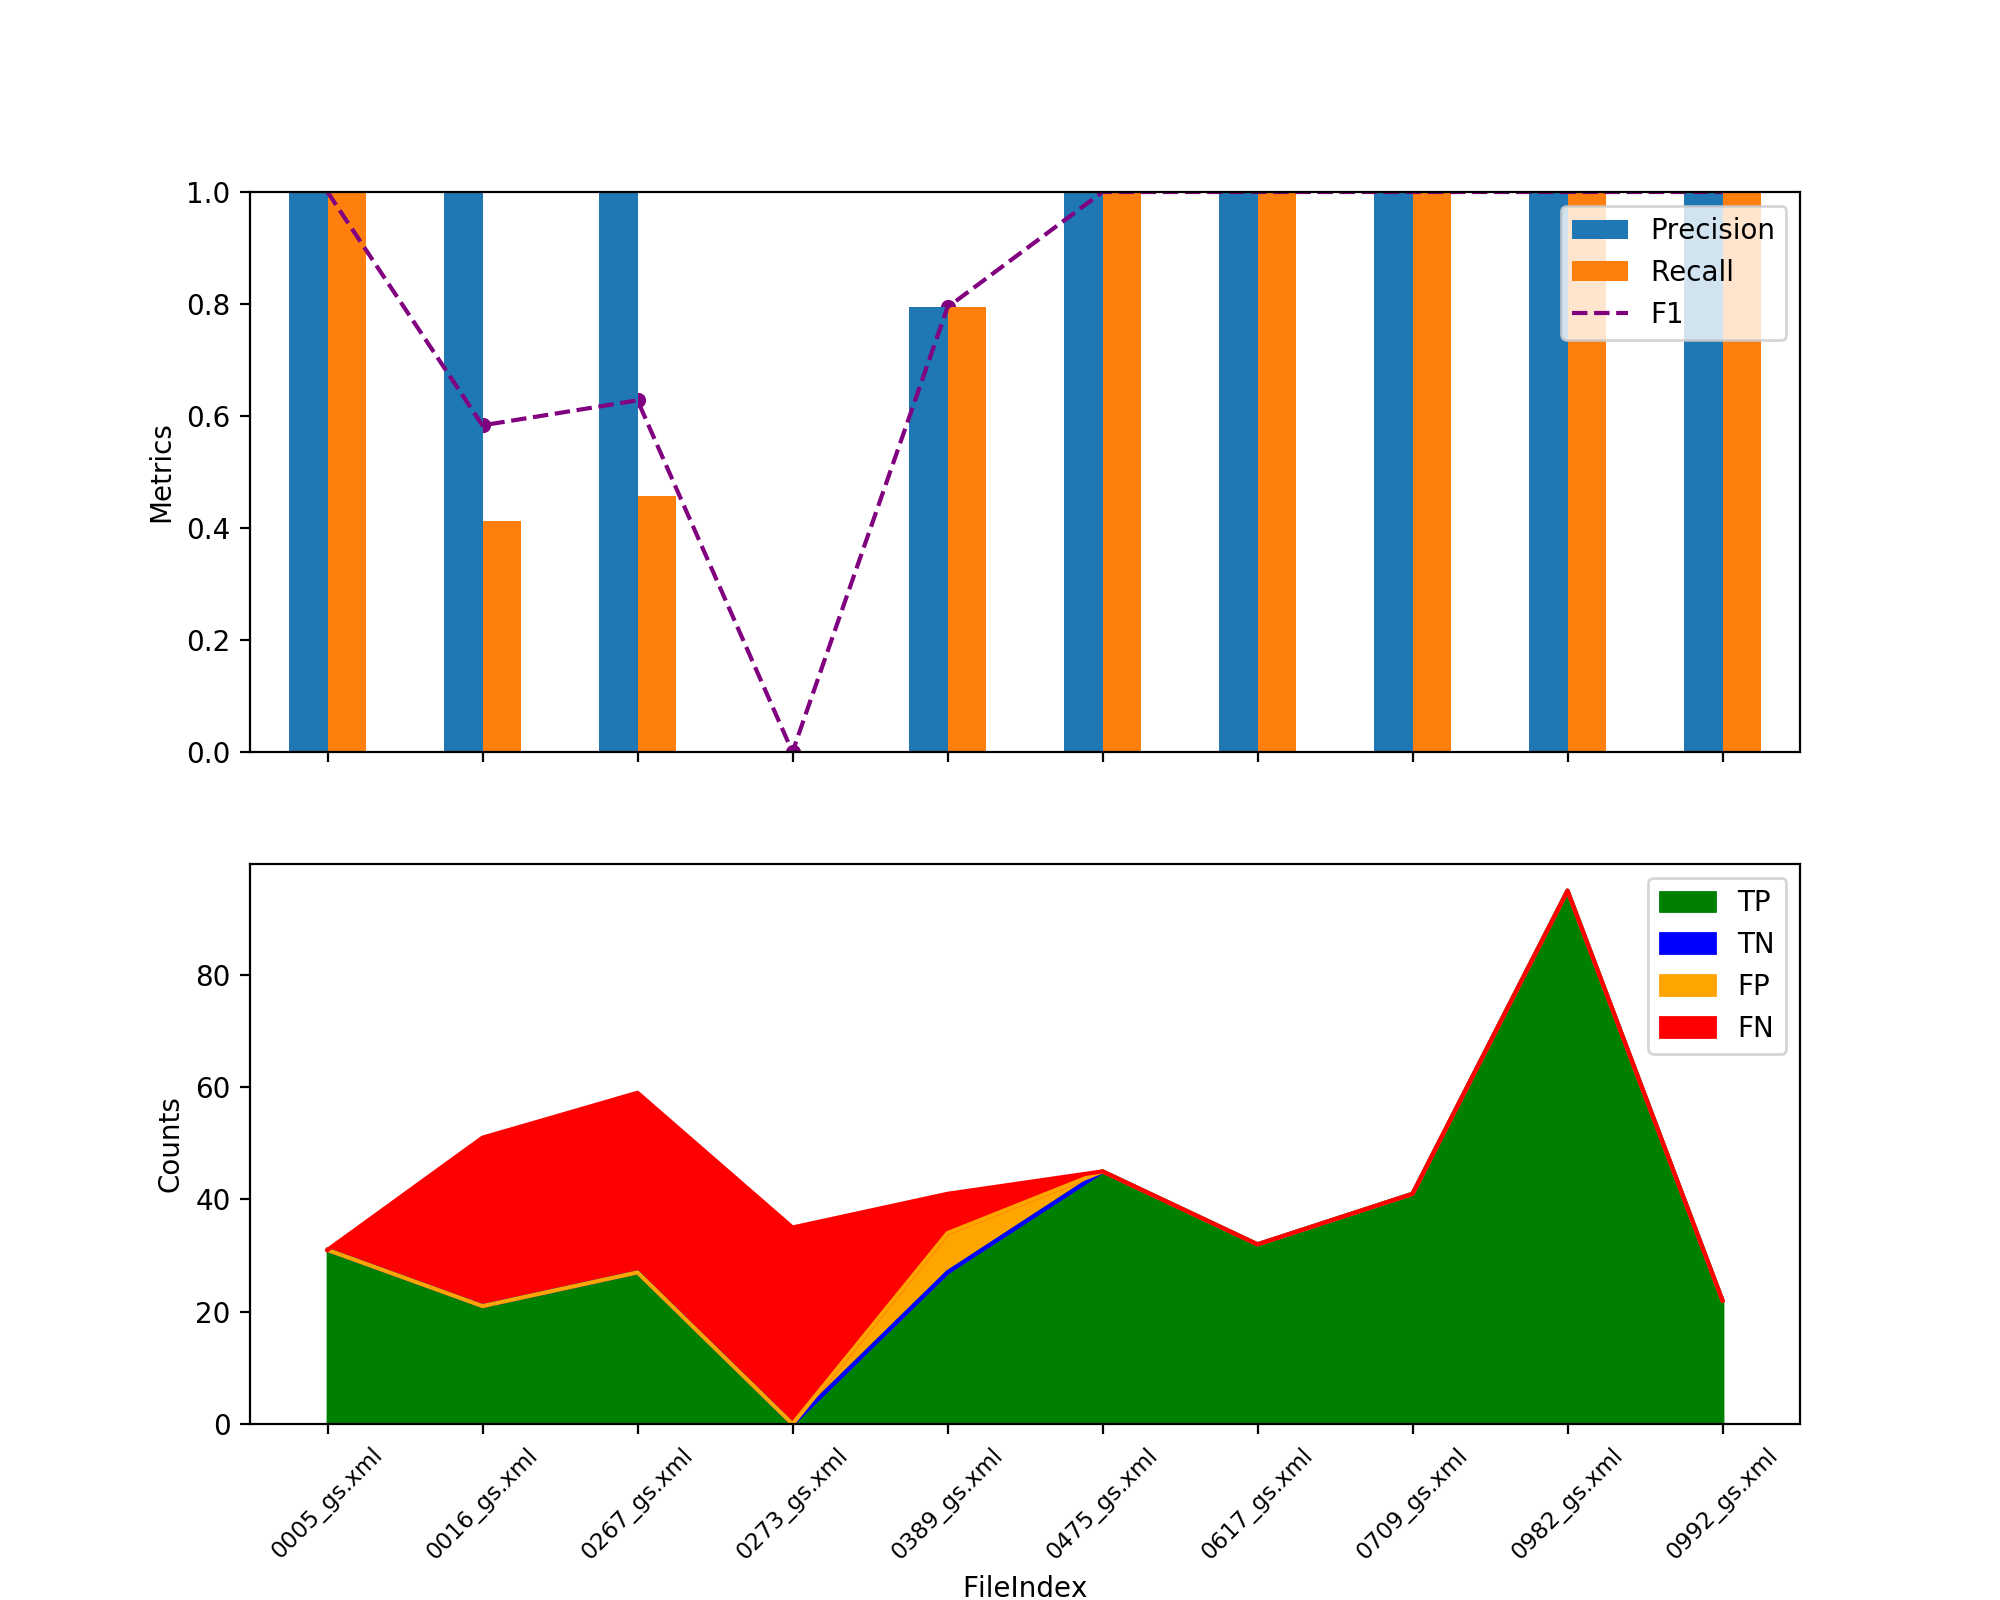

In [31]:
fig , ( ax1 , ax2 ) = plt.subplots( nrows = 2 , ncols = 1 , 
                                    sharex = True , 
                                    figsize = ( 10 , 8 ) , 
                                    gridspec_kw = { 'height_ratios' : [ 1 , 1 ] } )
coi = ( 'FileIndex' , 'Precision' , 'Recall' )
parent_df.loc[ : , coi ].plot( kind = 'bar' ,
                               x = 'FileIndex' , 
                               ax = ax1 )
parent_df.plot( kind = 'scatter' ,
                x = 'FileIndex' , y = 'F1' , 
                color = 'purple' , 
                ax = ax1 )
parent_df.plot( label = 'F1' , linestyle = '--' ,
                x = 'FileIndex' , y = 'F1' , 
                color = 'purple' , 
                ax = ax1 )
coi = ( 'FileIndex' , 'TP' , 'TN' , 'FP' , 'FN' )
parent_df.loc[ : , coi ].plot( kind = 'area' , stacked = True ,
                               x = 'FileIndex' , 
                               color = ( 'green' , 'blue' , 'orange' , 'red' ) ,
                               ax = ax2 )
ax1.set_ylim( [ 0 , 1 ] )
plt.xlim( [ -0.5 , 9.5 ] )
ax1.set( ylabel = 'Metrics' )
ax2.set( ylabel = 'Counts' )
plt.xticks( range( len( parent_df[ 'FileName' ] ) ) , parent_df[ 'FileName' ] , size = 'small' )
ax2.set_xticklabels( ax2.xaxis.get_majorticklabels() , rotation=45 )
plt.show()

In [32]:
parent_types = \
  !python ../etude.py \
    --reference-input /Users/pmh/git/webanno_vault/phi/trial_corpus/gold \
    --reference-config ../config/i2b2_2016_track-1.conf \
    --test-input /Users/pmh/data/webanno-phi/trial_corpus/wildem \
    --test-config ../config/webanno_phi_xmi.conf \
    --file-suffix ".xml" ".xmi" \
    --score-key "Parent" \
    -m TP FP TN FN Precision Recall F1 \
    --by-type 2> /dev/null

In [33]:
types_df = pd.read_table( StringIO( parent_types.n.strip() ) )
types_df = types_df[ 1: ]
types_df.rename( columns = {'exact': u'Type' } , inplace = True )
types_df[ 'TypeIndex' ] = types_df[ 'Type' ].astype( 'category' ).cat.codes
types_df

,Type,TP,FP,TN,FN,Precision,Recall,F1,TypeIndex
1,Address,22.0,45.0,0.0,7.0,0.328358,0.758621,0.458333,0
2,Contact Information,4.0,4.0,0.0,4.0,0.500000,0.500000,0.500000,1
3,Identifiers,5.0,1.0,0.0,2.0,0.833333,0.714286,0.769231,2
4,Locations,78.0,126.0,0.0,24.0,0.382353,0.764706,0.509804,3
5,Names,69.0,12.0,0.0,14.0,0.851852,0.831325,0.841463,4
6,Time,166.0,52.0,0.0,50.0,0.761468,0.768519,0.764977,5


<IPython.core.display.Javascript object>


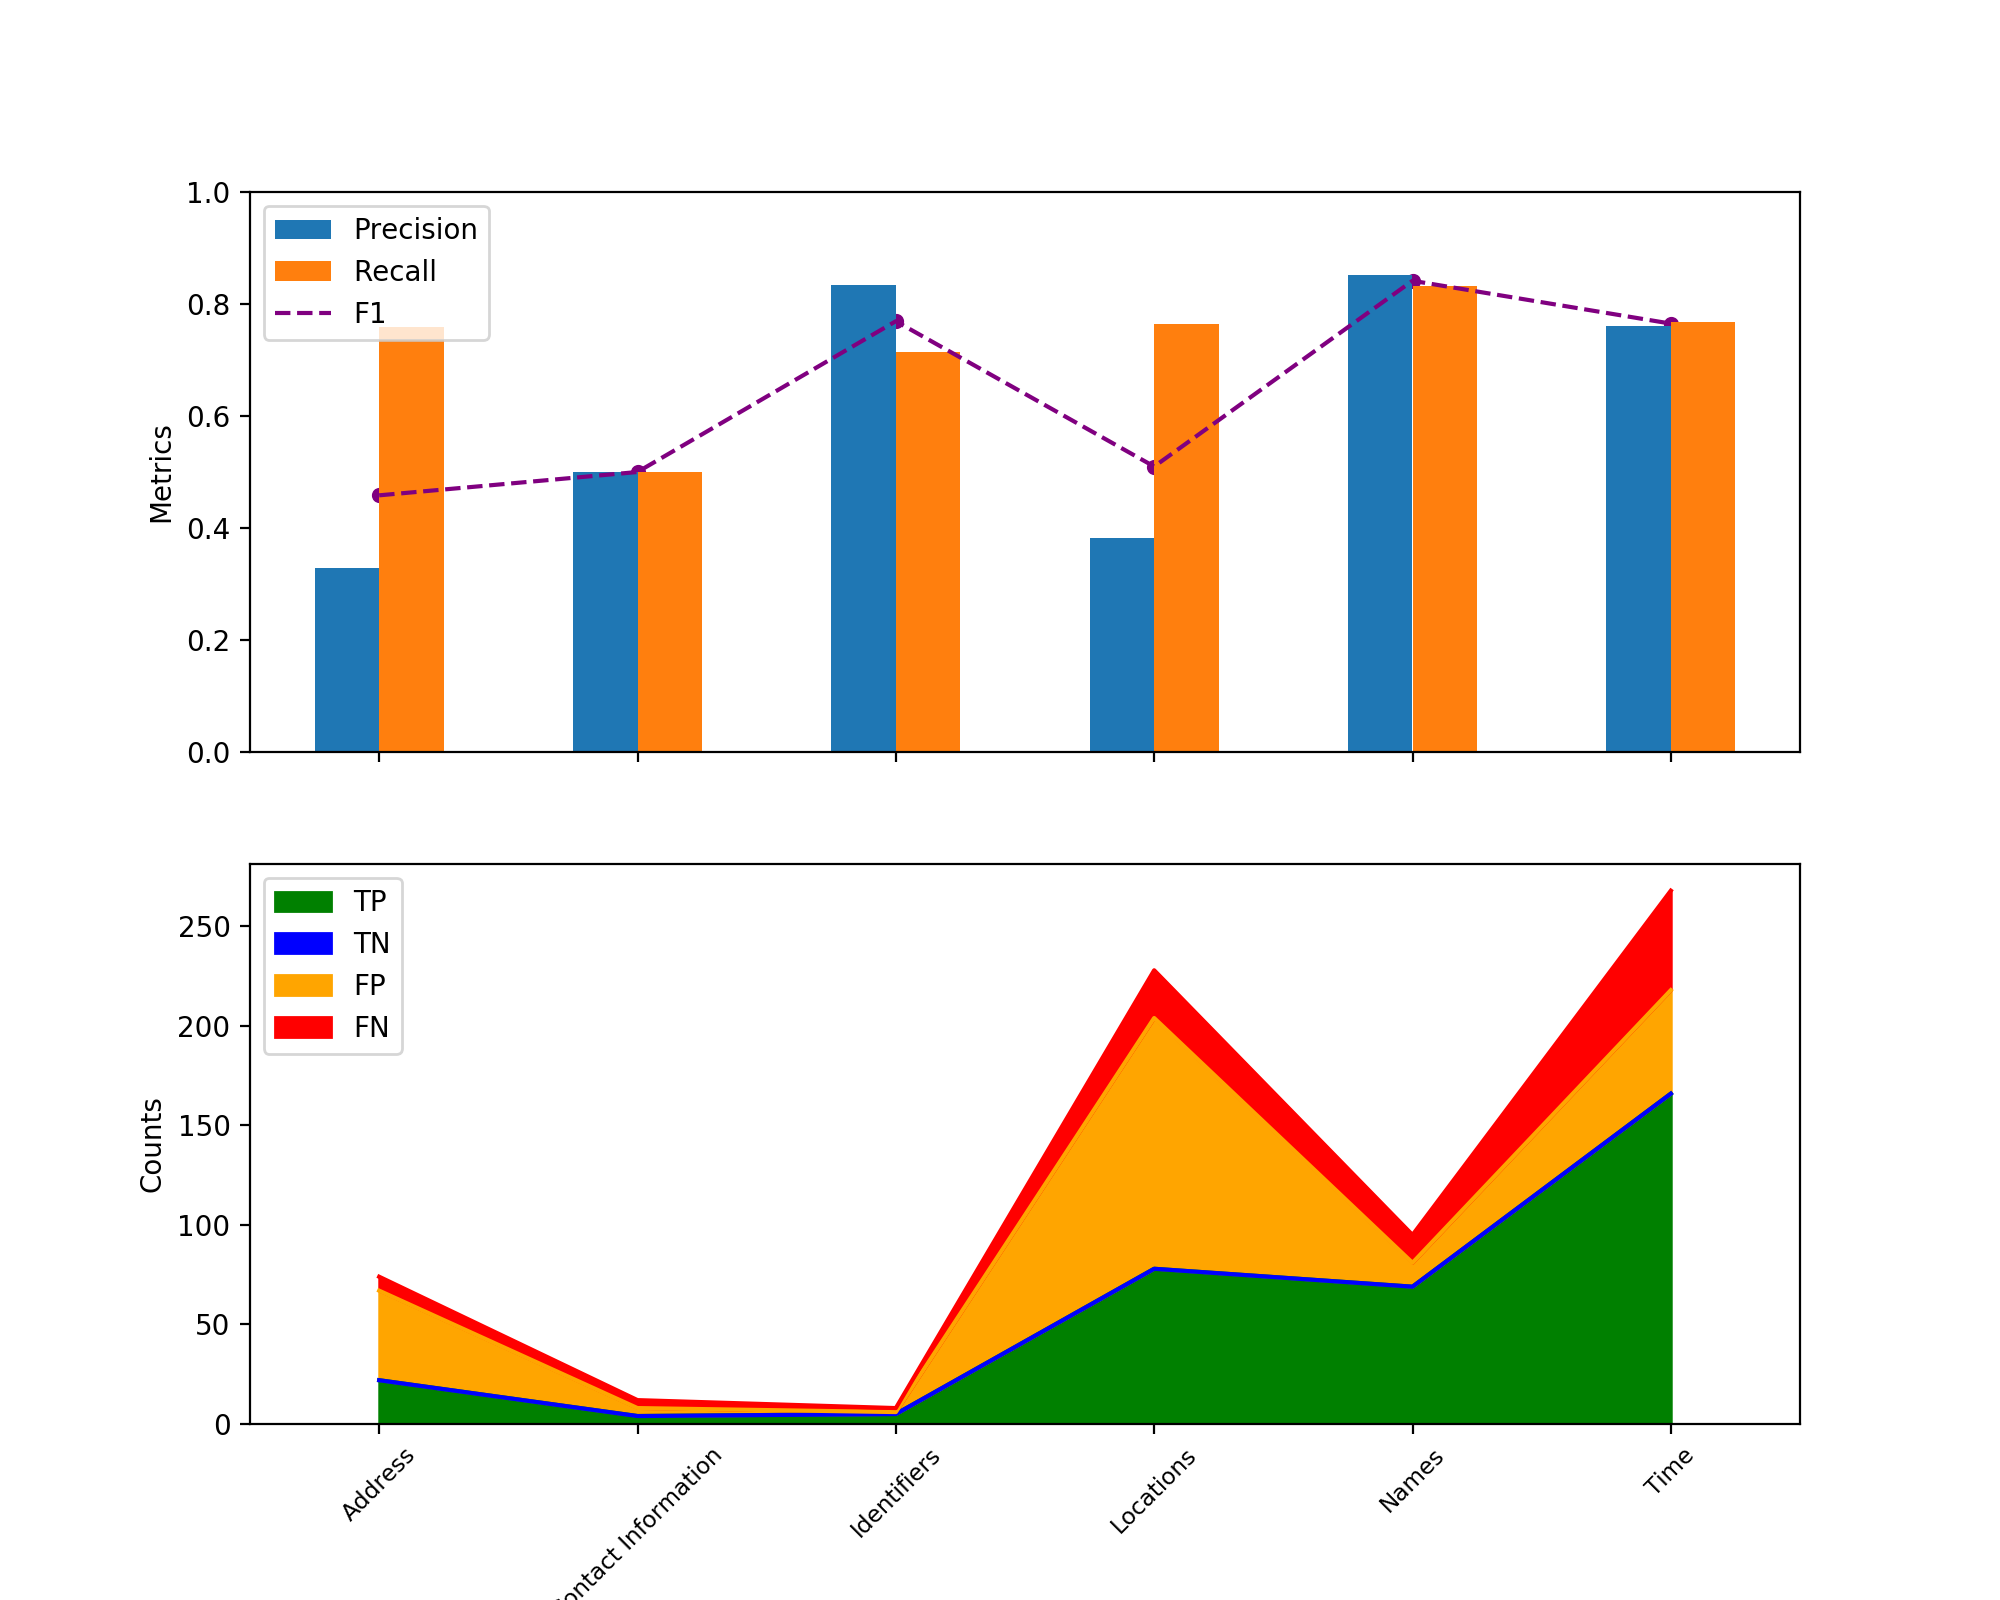

In [34]:
fig , ( ax1 , ax2 ) = plt.subplots( nrows = 2 , ncols = 1 , 
                                    sharex = True , 
                                    figsize = ( 10 , 8 ) , 
                                    gridspec_kw = { 'height_ratios' : [ 1 , 1 ] } )
coi = ( 'TypeIndex' , 'Precision' , 'Recall' )
types_df.loc[ : , coi ].plot( kind = 'bar' ,
                               x = 'TypeIndex' , 
                               ax = ax1 )
types_df.plot( kind = 'scatter' ,
                x = 'TypeIndex' , y = 'F1' , 
                color = 'purple' , 
                ax = ax1 )
types_df.plot( label = 'F1' , linestyle = '--' ,
                x = 'TypeIndex' , y = 'F1' , 
                color = 'purple' , 
                ax = ax1 )
coi = ( 'TypeIndex' , 'TP' , 'TN' , 'FP' , 'FN' )
types_df.loc[ : , coi ].plot( kind = 'area' , stacked = True ,
                               x = 'TypeIndex' , 
                               color = ( 'green' , 'blue' , 'orange' , 'red' ) ,
                               ax = ax2 )
ax1.set_ylim( [ 0 , 1 ] )
plt.xlim( [ -0.5 , 5.5 ] )
ax1.set( ylabel = 'Metrics' )
ax2.set( ylabel = 'Counts' )
plt.xticks( range( len( types_df[ 'Type' ] ) ) , types_df[ 'Type' ] , size = 'small' )
ax2.set_xticklabels( ax2.xaxis.get_majorticklabels() , rotation=45 )
plt.show()